<a href="https://colab.research.google.com/github/asolerpla/web-platform-ikgyxk/blob/master/Seminario_07MBIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Películas y programas de televisión de Netflix | Visualización de datos




---
Andrea Soler Pla | asolerpla@gmail.com | 25-04-2021 
<br>
URL GitHub: 
<br>
URL Google Colab:https://colab.research.google.com/drive/1bT9ZE1LdqSQjNbtA6ehOOs7c7I3gs7m0?usp=sharing
<br>
URL AG2 - Aprendizaje estadístico y minería de datos - (05MBIG): https://drive.google.com/file/d/1iiqaNioYuq99YFyTYACKSMTEv05HY3wN/view?usp=sharing


In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

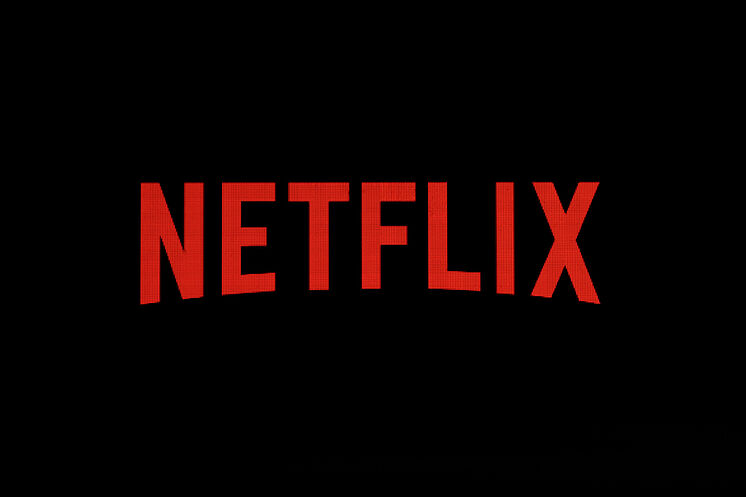

In [ ]:
Image('netflix.jpg', width=400)

## **Introducción**
<br>

Este seminario se va a realizar como continuación de la AG2 de la asignatura de Aprendizaje estadístico y Minería de Datos. Se puede acceder a dicha actividad a través del siguiente enlace: https://drive.google.com/file/d/1iiqaNioYuq99YFyTYACKSMTEv05HY3wN/view?usp=sharing. 

En esta actividad (AG2 05MBIG) se pretendia transformar los datos elegidos para su posterior análisis. Es decir, transformar los datos brutos en datos útiles para su estudio. Para ello, se seleccionó un conjunto de datos de programas de TV y películas disponibles en Netflix a partir de 2019. Este conjunto de datos se recopiló de Flixable, que es un motor de busqueda de Netflix de terceros.

Este dataset me pareció interesante porque en 2018 Flixable publicó un informe **[1]** que mostraba que la cantidad de programas de TV de Netflix casi se había triplicado desde 2010. Por el contrario, la cantidad de películas había disminuido en más de 2.000 títulos desde 2010.





## **Objetivos**

En este seminario de visualización he considerado estudiar y visualizar los siguientes objetivos para obtener tener una mayor claridad: 



1.   ¿Qué contenido está disponible en cada país?
2.   ¿Netflix se ha centrado cada vez más en las series en lugar de las películas en los últimos años?
3.   Identificar contenido similar haciendo coincidir características basadas en texto.









In [197]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [198]:
df = pd.read_csv("netflix_result.csv")
df.head()

,show_id,Unnamed: 0,type,title,country,date_added,release_year,rating,duration,american,month_added,year_added,recommended_age,rating_description,18+
0,81145628,0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,Yes,9,2019,7,Older Kids,No
1,80988892,30,Movie,Next Gen,"China, Canada, United States",2018-09-07,2018,TV-PG,106 min,Yes,9,2018,7,Older Kids,No
2,80095641,43,Movie,Elstree 1976,United Kingdom,2016-09-06,2015,TV-PG,102 min,No,9,2016,7,Older Kids,No
3,81016045,48,Movie,One Day,Thailand,2018-09-05,2016,TV-PG,135 min,No,9,2018,7,Older Kids,No
4,80128317,67,TV Show,The Eighties,United States,2018-09-30,2016,TV-PG,1 Season,Yes,9,2018,7,Older Kids,No


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             6224 non-null   int64 
 1   Unnamed: 0          6224 non-null   int64 
 2   type                6224 non-null   object
 3   title               6224 non-null   object
 4   country             6224 non-null   object
 5   date_added          6224 non-null   object
 6   release_year        6224 non-null   int64 
 7   rating              6224 non-null   object
 8   duration            6224 non-null   object
 9   american            6224 non-null   object
 10  month_added         6224 non-null   int64 
 11  year_added          6224 non-null   int64 
 12  recommended_age     6224 non-null   int64 
 13  rating_description  6224 non-null   object
 14  18+                 6224 non-null   object
dtypes: int64(6), object(9)
memory usage: 729.5+ KB


Como se puede ver el dataset consta de 14 columnas y 6224 filas. No hay valores nulos.

In [200]:
df.isnull().sum()

show_id               0
Unnamed: 0            0
type                  0
title                 0
country               0
date_added            0
release_year          0
rating                0
duration              0
american              0
month_added           0
year_added            0
recommended_age       0
rating_description    0
18+                   0
dtype: int64

Como se puede observar el dataset esta limpio y no tiene valores nulos.

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving distribución.png to distribución.png


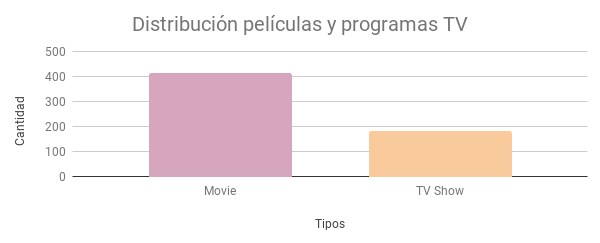

In [ ]:
Image('distribución.png', width=600)

Como se puede observar en el siguiente gráfico de barras realizado en Google Sheet, existen dos tipos de contenidos en Netflix. Por lo tanto, 4257 (*Movie*)  y 1967 (*TV Show*) películas en el conjunto de datos seleccionado. Se puede acceder al gráfico a través del siguiente enlace: https://docs.google.com/spreadsheets/d/e/2PACX-1vS1bSW4Y9OYABMYgGe6OeM9q2enwlGOTnnqiLsrvK1RRtW-LDrjhy4_OlEjc0RyKz10jFoB1FM3FJ4N/pubchart?oid=1648727669&format=interactive

In [201]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['rating_description'] = pd.Categorical(df['rating_description'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

(-1.2492608582336613,
 1.2455479219494985,
 -1.2020542358243873,
 1.1907073445343757)

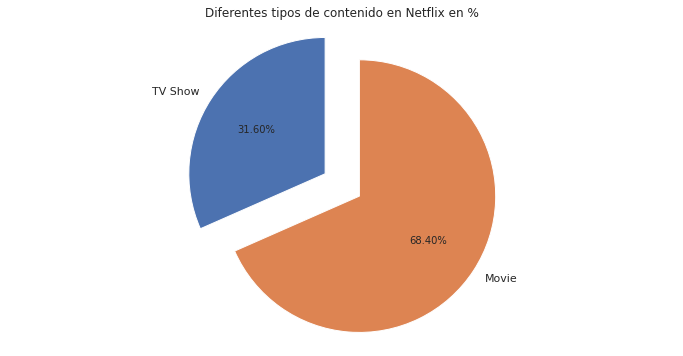

In [202]:
plt.figure(figsize=(12,6))
label=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Diferentes tipos de contenido en Netflix en %')
plt.axis('equal')

Según se observa en el gráfico de tarta o sector, el 31.6% son *TV Show* (programas de TV) y el 68.4% son *Movie* (películas). Por otro lado, se ha elegido este gráfico porque se pretendía mostrar la proporción de cada categoría.

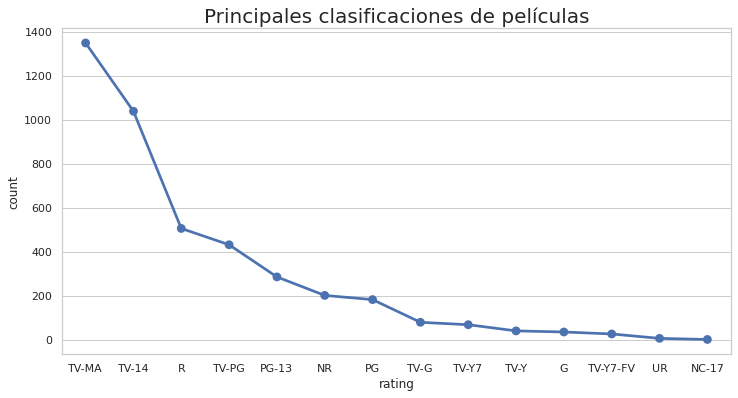

In [203]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Principales clasificaciones de películas',size='20')
plt.show()

Se ha utilizado un gráfico de línea para visualizar la tendencia de una variable a lo largo del tiempo, más concretamente la evolución de la clasificación de películas. 

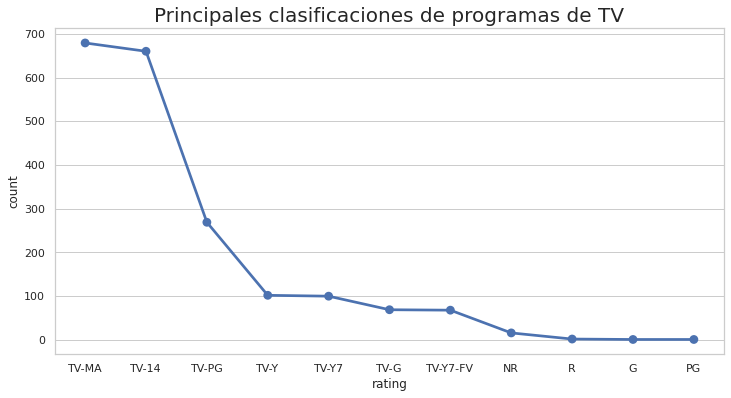

In [204]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Principales clasificaciones de programas de TV',size='20')
plt.show()

Se ha utilizado un gráfico de línea para visualizar la tendencia de una variable a lo largo del tiempo, más concretamente la evolución de la clasificación de programas de TV. 

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving clasificación.png to clasificación.png


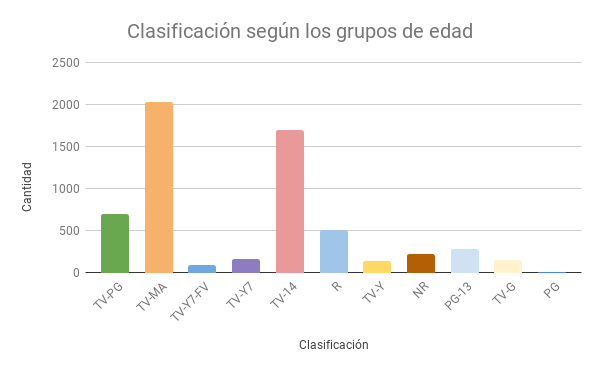

In [ ]:
Image('clasificación.png', width=600)

Como se observa en el gráfico de barras creado en Google Sheet, el mayor recuento de películas se realiza con la clasificación 'TV-MA'. "TV-MA" es una clasificación asignada para audiencias maduras. El segundo más grande es 'TV-14', que significa contenido que puede ser inapropiado para niños menores de 14 años. Luego, esta el 'TV-PG'. Y, por último, el cuarto más grande es la clasificación 'R'. Una película clasificada como R es una película que ha sido evaluada por tener material que puede ser inadecuado para niños menores de 17 años por la *Motion Picture Association of America*. El gráfico se puede observar en el siguiente enlace: https://docs.google.com/spreadsheets/d/e/2PACX-1vS1bSW4Y9OYABMYgGe6OeM9q2enwlGOTnnqiLsrvK1RRtW-LDrjhy4_OlEjc0RyKz10jFoB1FM3FJ4N/pubchart?oid=1466570399&format=interactive

In [205]:
edad = df['rating'].value_counts().reset_index().T
clasificacion = pd.DataFrame()
clasificacion['Adults'] = edad[0]+edad[3]+edad[13]
clasificacion['Teens'] = edad[1] + edad[4]
clasificacion['Kids'] = edad[7] + edad[11] + edad[6] + edad[2]
clasificacion['Little Kids'] = edad[10] + edad[5] + edad[8]
clasificacion = clasificacion.T
clasificacion.drop(columns='index')
clasificacion.drop(columns='index')

,rating
Adults,2537
Teens,1984
Kids,1091
Little Kids,462


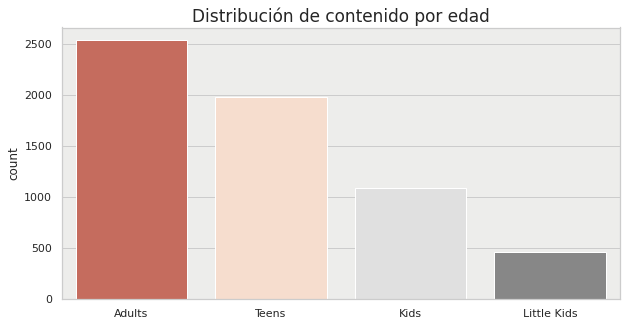

In [206]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
sns.barplot( clasificacion.index,clasificacion['rating'], palette='RdGy')
ax.set_facecolor(('#EDEDEB'))
ax.set_title('Distribución de contenido por edad', fontsize=17)
ax.set_ylabel('count')
plt.show()

Grácias a este gráfico de columas podemos observar como la mayor parte de la distribución es para los adultos con más de 2500. Por otro lado, la menor parte del contenido se encuentra en los niños.

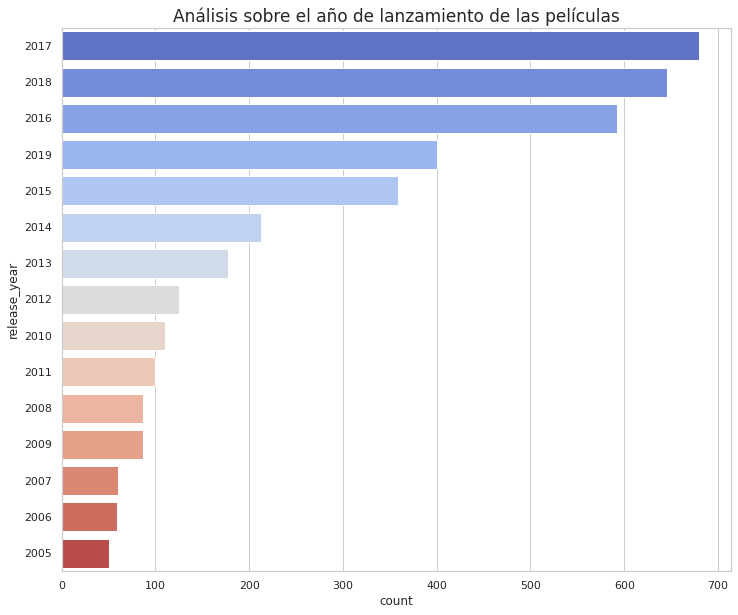

In [207]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", order=df_movie['release_year'].value_counts().index[0:15])

plt.title('Análisis sobre el año de lanzamiento de las películas', fontsize=17)
plt.show()

Según se observa en el gráfico de barras anterior, el año en que se estrenaron la gran mayoría de películas fue 2017.

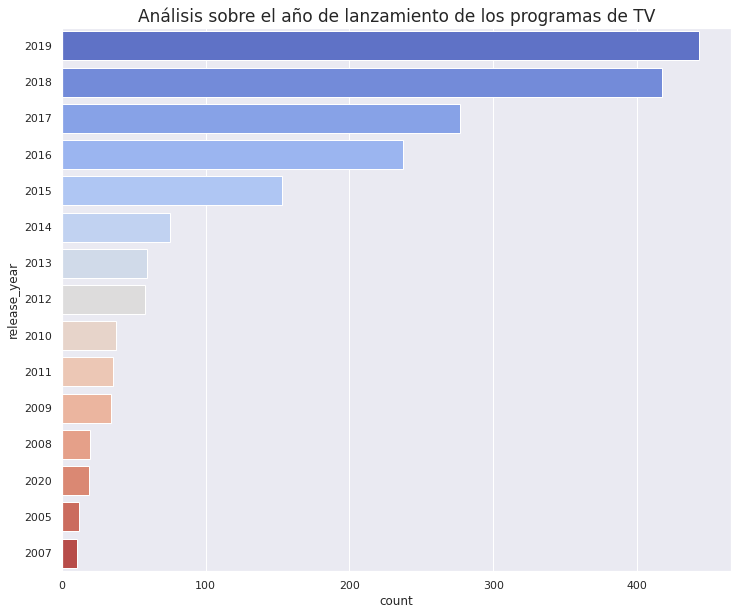

In [208]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('Análisis sobre el año de lanzamiento de los programas de TV', fontsize=17)
plt.show()


Por otro lado, según se puede ver el año que más programas de TV se estrenó fue el 2019. Y por último, también podemos ver gracias a los últimos gráficos obtenidos como Netflix se está centrando cada vez más en los programas de TV. 

In [222]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving data.png to data.png


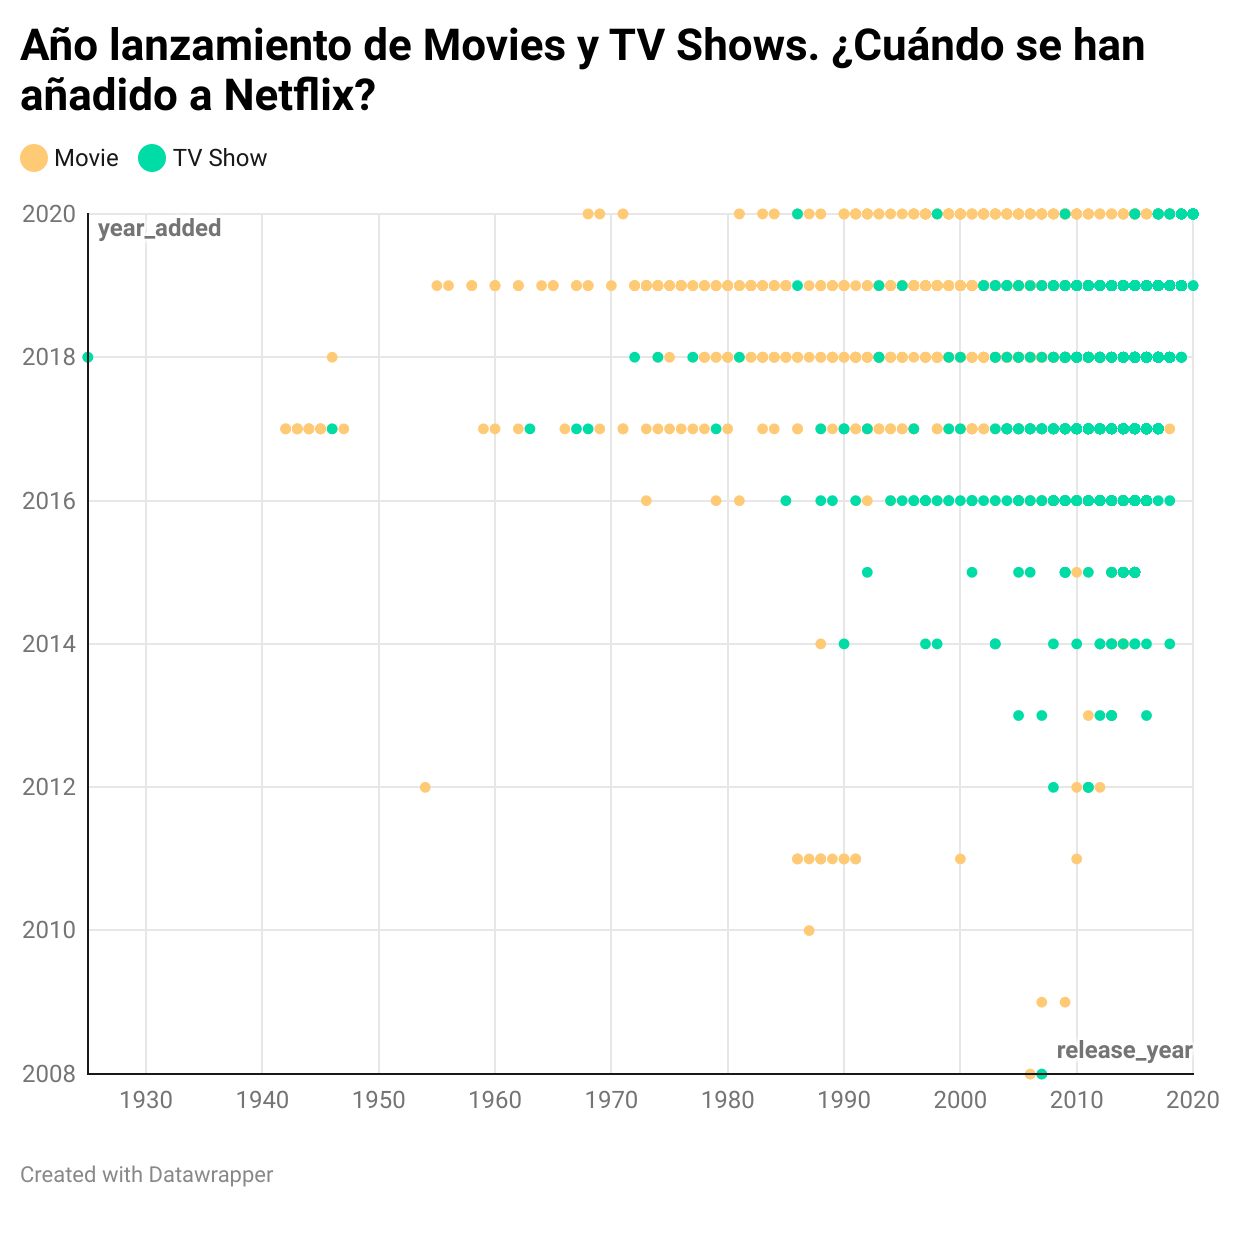

In [223]:
Image('data.png', width=600)

Este gráfico esta creado con Datawrapper y nos muestra cuando una película o programa de TV se ha lanzado o publicado y cuando es añadida por Netflix a su plataforma. Por ejemplo, una película es lanzada el 1960 y publicada por Netflix el 2017. 

https://datawrapper.dwcdn.net/5eaxp/1/

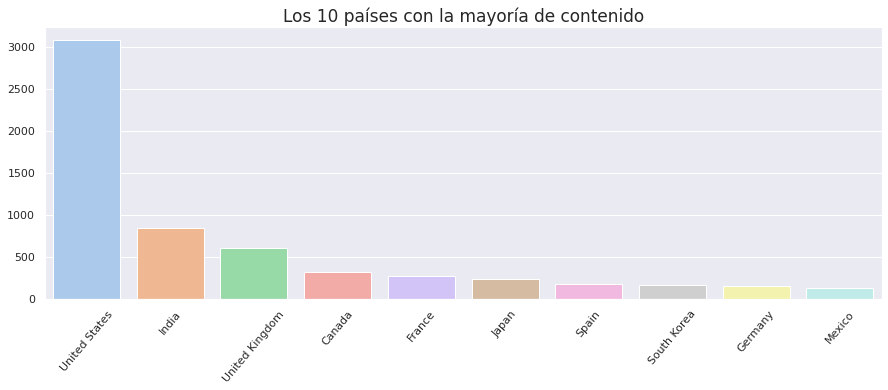

In [209]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Los 10 países con la mayoría de contenido', fontsize=17)
plt.show()


Los productores más prolíficos de contenido para Netflix son, principalmente, Estados Unidos, India y Reino Unido.Tiene sentido que Estados Unidos produzca el mayor contenido, después de todo, Netflix es una empresa estadounidense.

In [ ]:
!pip install -q pycountry
!pip install -q --upgrade pymc3

     |████████████████████████████████| 10.1MB 3.9MB/s 
     |████████████████████████████████| 870kB 5.1MB/s 
     |████████████████████████████████| 1.6MB 9.3MB/s 
     |████████████████████████████████| 1.8MB 22.0MB/s 
     |████████████████████████████████| 768kB 42.8MB/s 
     |████████████████████████████████| 4.7MB 35.1MB/s 
     |████████████████████████████████| 317kB 49.7MB/s 


In [210]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribución de la clasificación de las {title}', fontsize=17, position=(0.5, 1.0+0.03))
    plt.show()

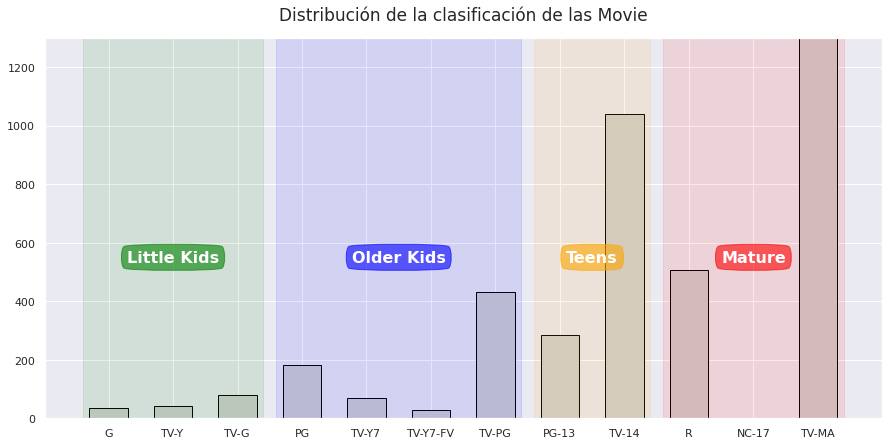

In [211]:
rating_barplot(movie_rating,'Movie', 550, 1300)

Como se puede observar en el gráfico hay muchas más películas para niños mayores, adolescentes y adultos que para niños pequeños. Por otro lado, la mayoría de la películas son para mayores. 

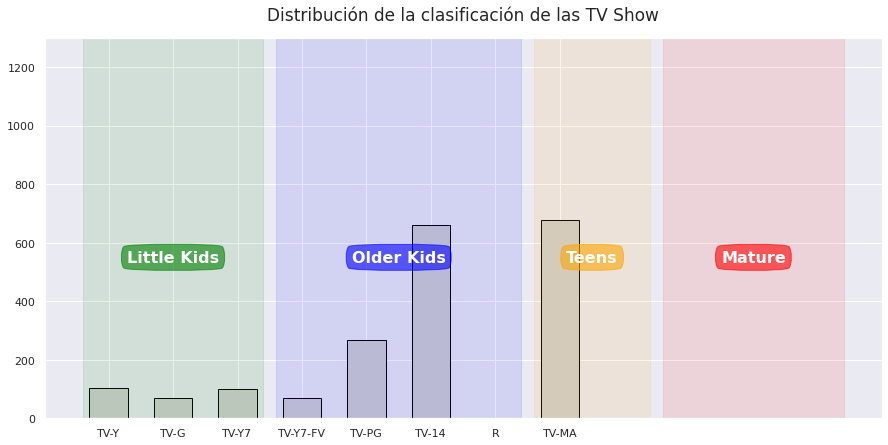

In [212]:
rating_barplot(tv_rating,'TV Show', 550, 1300)

Por otro lado, según se observa en el gráfico los programas de TV son más para niños y adolescentes.

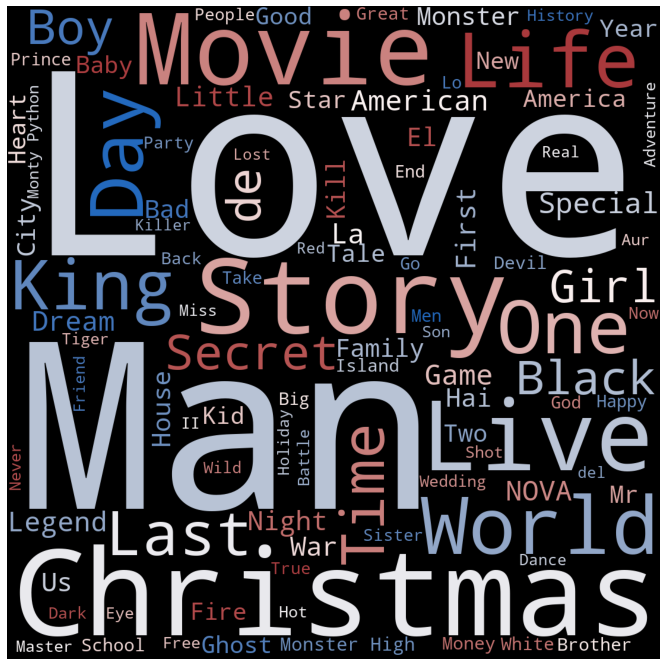

In [235]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1100,  height = 1100, max_words = 100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Y, por último gracias a este gráfico de nubes he obtenido de forma visual la frecuencia y el valor de las palabras. Lo he utilizado para resaltar la frecuencia con la que un término específico o categoría aparece en este conjunto de datos. Por lo tanto, se puede observar como las palabras en los titulos de las películas más utilizadas son por orden de importancia las siguientes: love, man, christmas y story.


## **Herramientas utilizadas**
A continuación se detallan las herramientas utilizadas para elaborar este seminario: 
<br>

**1.**   **Google Sheets** se trata de un servicio vía web de hojas de cálculo, realizado en tecnología AJAX.
<br>
**2.**   **Google Colab** es un servicio cloud, basado en los Notebooks de Jupyter, que permite el uso gratuito de las GPUs y TPUs de Google, con librerías como: Scikit-learn, PyTorch, TensorFlow, Keras y OpenCV. Todo ello con bajo Python 2.7 y 3.6, que aún no está disponible para R y Scala.
<br>
**3.**   Lenguaje de programación **Python** cuya filosofía hace hincapié en la legibilidad de su código. Se trata de un lenguaje de programación multiparadigma, ya que soporta parcialmente la orientación a objetos, programación imperativa y, en menor medida, programación funcional. Es un lenguaje interpretado, dinámico y multiplataforma.
<br>
**4.**   **Datawrapper** es una herramienta popular y de fácil acceso para hacer visualizaciones interactivas. La aplicación permite crear diagramas desde una base de datos utilizando columnas, líneas, fracciones y barras. Así mismo se puede introducir el diagrama a través de un código.







## **Bibliografía**

**[1]** Enlace informe publicado por Flixable: https://flixable.com/netflix-museum/